## Sim Demo

### Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from env.imports import *

/ext3/miniconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
2025-04-03 17:47:23.267711: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-03 17:47:24.795525: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-04-03 17:47:27.020214: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [3]:
import importlib
import data

import models
import sim.sim
import sim.sim_utils
from sim.sim_utils import bytes2human, print_system_usage
from sim.sim import Simulation
from sim.sim_run import single_sim_run

#### Check job specs

In [4]:
print_system_usage()

total = psutil.disk_usage('/').total
print(bytes2human(total))

CPU Usage: 62.0%
RAM Usage: 11.3%
Available RAM: 1.3T
Total RAM: 1.5T
52.4G


In [5]:
print(os.environ.get("CUDA_VISIBLE_DEVICES"))

# Check available GPUs
print(f"Available GPUs: {torch.cuda.device_count()}")

for i in range(torch.cuda.device_count()):
    print(f"GPU {i}: {torch.cuda.get_device_name(i)} - Memory Allocated: {torch.cuda.memory_allocated(i)/1024**3:.2f} GB")


None
Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.00 GB


In [6]:
print("XGBoost version:", xgboost.__version__)
print("cupy version:", cp.__version__)

GPUtil.getAvailable()

# if a number is seen a GPU is available
GPUtil.getGPUs()

DEVICE_ID_LIST = GPUtil.getFirstAvailable()
DEVICE_ID = DEVICE_ID_LIST[0] # grab first element from list
if DEVICE_ID != None: 
    print('GPU found', DEVICE_ID)
    use_gpu = True

    GPUtil.showUtilization()

XGBoost version: 2.0.3
cupy version: 13.1.0
GPU found 0
| ID | GPU | MEM |
------------------
|  0 |  0% |  2% |


In [7]:
torch.cuda.is_available()

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()

#### Simulation tests <a id="sims"></a>

Number of components for 95% variance PCA: 27
Number of 1s: 36662, Number of 0s: 171274, Class balance (1s): 0.176
Number of 1s: 17738, Number of 0s: 190198, Class balance (1s): 0.085
X shape: (455, 7380)
X_pca shape: (455, 27)
Y_sc shape: (455, 455)
Y_sc_spectralL shape: (455, 455)
Y_sc_spectralA shape: (455, 456)
Y_fc shape: (455, 455)
Coordinates shape: (455, 3)
Y shape (455, 455)
feature_name:  transcriptome
processing_type:  None
features ['transcriptome']
X generated... expanding to pairwise dataset


  return LooseVersion(v) >= LooseVersion(check)

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: Currently logged in as: asratzan (alexander-ratzan-new-york-university). Use `wandb login --relogin` to force relogin


1
2
3
BEST CONFIG {'input_dim': 14760, 'binarize': False, 'token_encoder_dim': 30, 'd_model': 64, 'encoder_output_dim': 20, 'use_positional_encoding': False, 'nhead': 2, 'num_layers': 2, 'deep_hidden_dims': [256, 128], 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'lambda_reg': 0, 'batch_size': 512, 'epochs': 50}


  warnings.warn(



Available GPUs: 1
GPU 0: NVIDIA H100 80GB HBM3 - Memory Allocated: 0.01 GB
Best val loss so far at epoch 1: 0.0322
Best val loss so far at epoch 2: 0.0262
Best val loss so far at epoch 3: 0.0227
Best val loss so far at epoch 4: 0.0209
Epoch 5/50, Train Loss: 0.0353, Val Loss: 0.0215
Best val loss so far at epoch 6: 0.0188
Best val loss so far at epoch 7: 0.0181
Best val loss so far at epoch 8: 0.0168
Best val loss so far at epoch 9: 0.0158
Epoch 10/50, Train Loss: 0.0115, Val Loss: 0.0154
Best val loss so far at epoch 10: 0.0154
Best val loss so far at epoch 11: 0.0150
Best val loss so far at epoch 12: 0.0143
Best val loss so far at epoch 14: 0.0141
Epoch 15/50, Train Loss: 0.0070, Val Loss: 0.0136
Best val loss so far at epoch 15: 0.0136
Best val loss so far at epoch 17: 0.0135
Epoch 20/50, Train Loss: 0.0053, Val Loss: 0.0137
Epoch 25/50, Train Loss: 0.0044, Val Loss: 0.0137
Best val loss so far at epoch 26: 0.0134
Epoch 30/50, Train Loss: 0.0039, Val Loss: 0.0134
Best val loss so fa

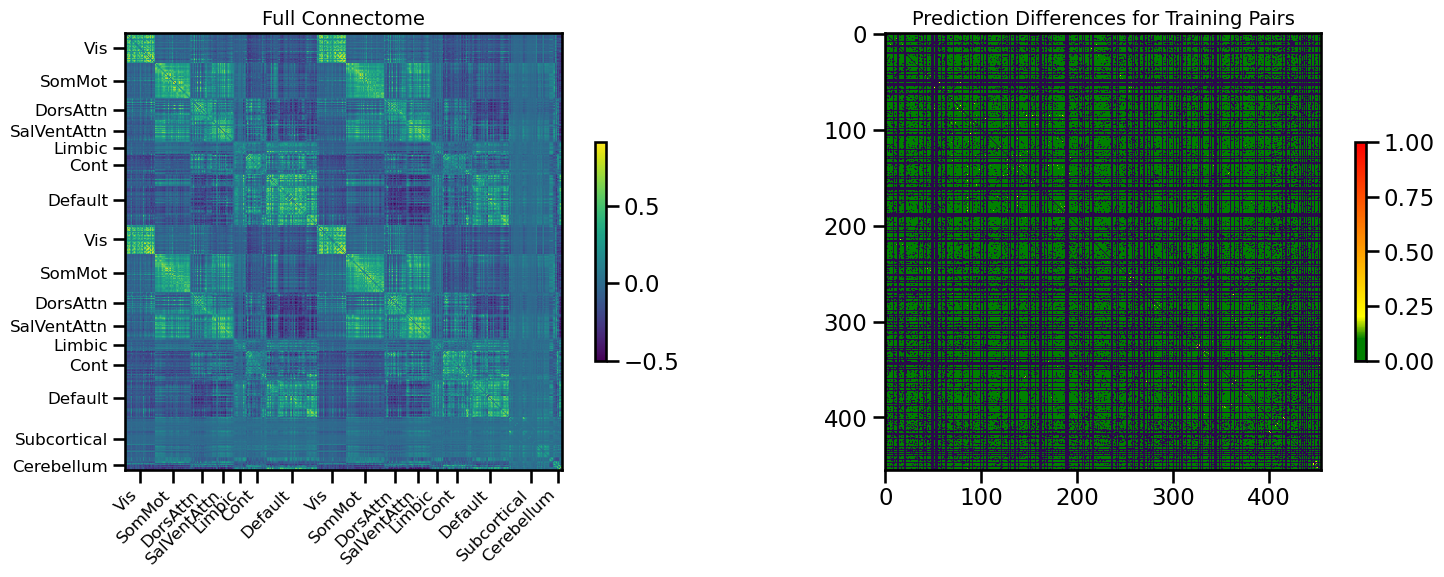

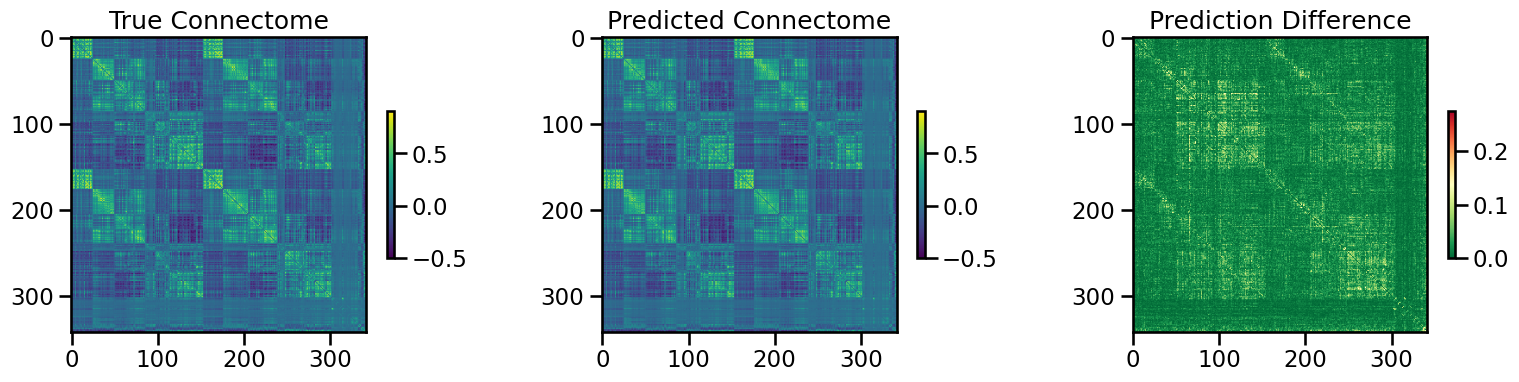

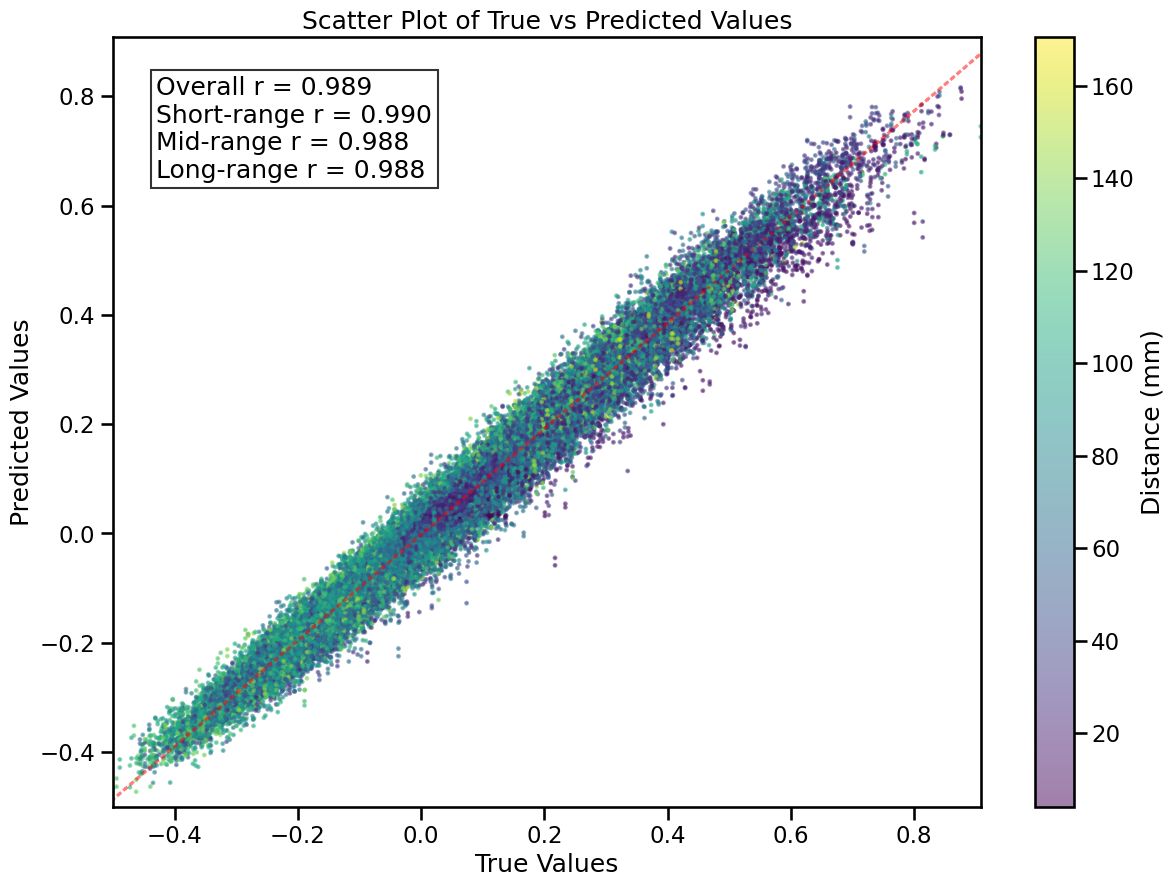

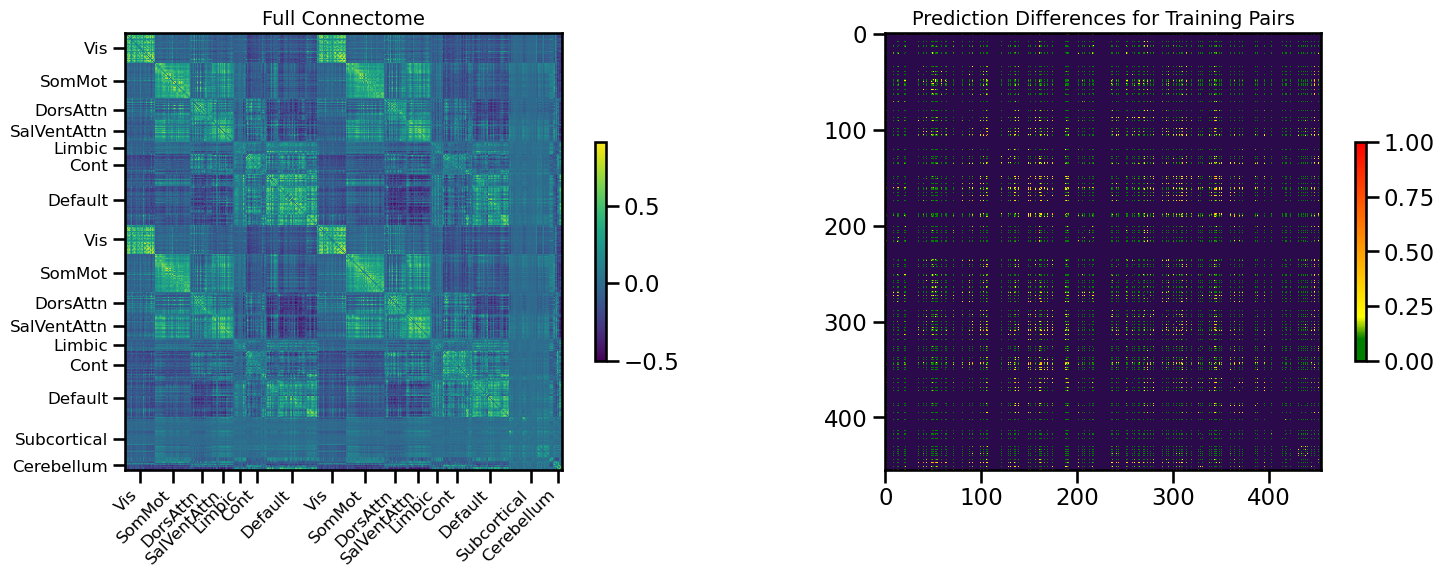

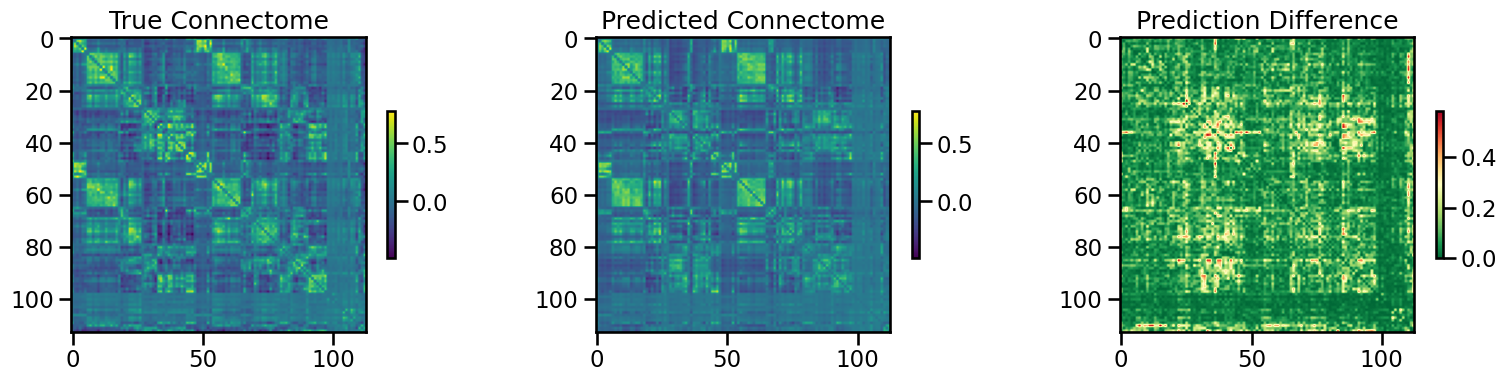

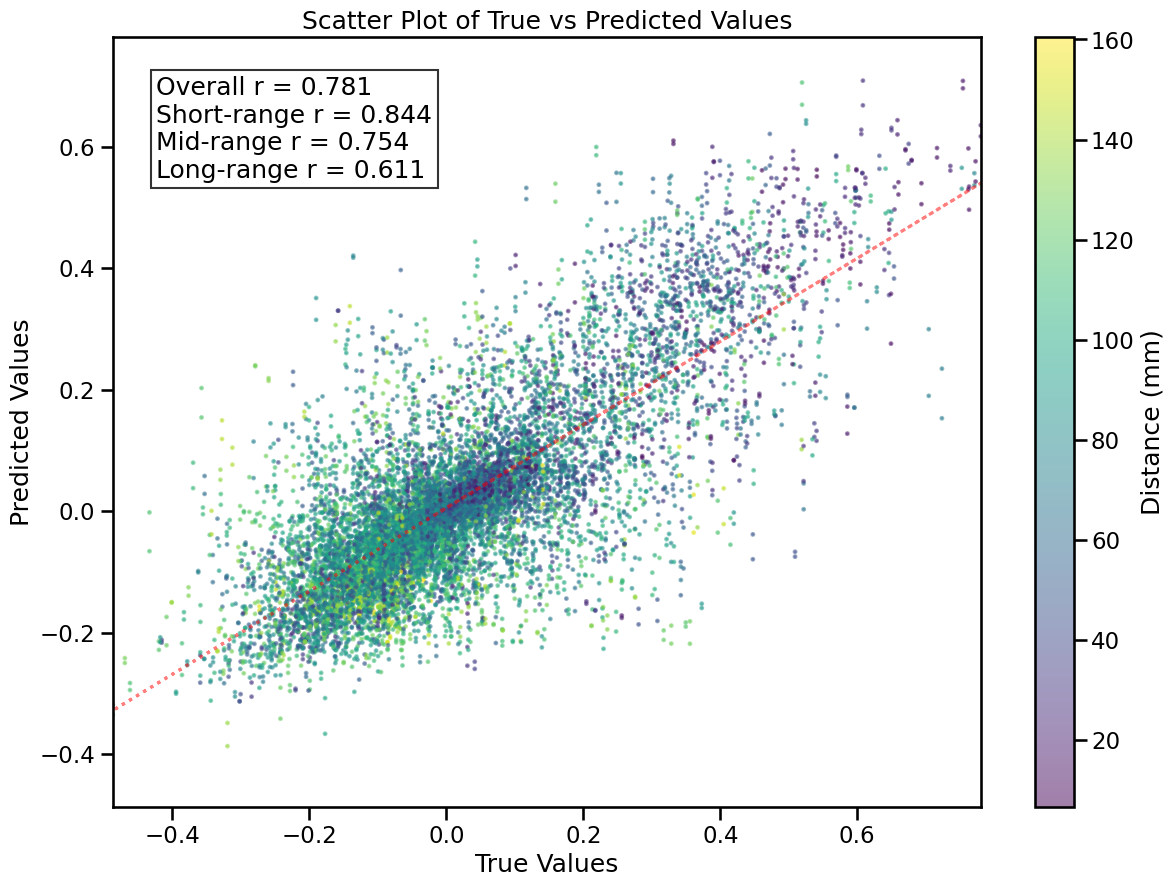


TRAIN METRICS: {'mse': 0.0007488213, 'mae': 0.019772554, 'r2': 0.9779234630628493, 'pearson_corr': 0.9890329535359121, 'geodesic_distance': 13.34797145554567}
TEST METRICS: {'mse': 0.013084469, 'mae': 0.079619825, 'r2': 0.6016064527871499, 'pearson_corr': 0.78141337299746, 'geodesic_distance': 10.7400133149997}
BEST VAL SCORE 0.0
BEST MODEL HYPERPARAMS {'input_dim': 7380, 'binarize': False, 'token_encoder_dim': 30, 'd_model': 64, 'encoder_output_dim': 20, 'nhead': 2, 'num_layers': 2, 'deep_hidden_dims': [256, 128], 'transformer_dropout': 0.2, 'dropout_rate': 0.2, 'learning_rate': 9e-05, 'weight_decay': 0.0001, 'lambda_reg': 0, 'batch_size': 512, 'epochs': 50}
CPU Usage: 60.0%
RAM Usage: 11.5%
Available RAM: 1.3T
Total RAM: 1.5T
| ID | GPU | MEM |
------------------
|  0 |  0% |  6% |


36455

In [8]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='shared_transformer',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              binarize=False,
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              gene_list='0.2',
              impute_strategy='mirror_interpolate',
              sort_genes='expression',
              hemisphere='both',
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=False,
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()

In [ ]:
single_sim_run(
              cv_type='random',
              random_seed=42,
              model_type='shared_transformer_cls',
              feature_type=[{'transcriptome': None}],
              connectome_target='FC',
              binarize=False,
              use_gpu=True,
              use_shared_regions=False,
              test_shared_regions=False,
              omit_subcortical=False,
              parcellation='S400',
              gene_list='0.2',
              impute_strategy='mirror_interpolate',
              sort_genes='expression',
              hemisphere='both',
              search_method=('wandb', 'mse', 1),
              save_sim=False,
              track_wandb=False,
              skip_cv=True
              )

# Clear GPU memory
if torch.cuda.is_available():
    torch.cuda.empty_cache()
# Clear CPU memory
gc.collect()